# Author: Sreya Dhar (SHALA 2020)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics.cluster import homogeneity_score, completeness_score, v_measure_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving assignment_shala_clustering.csv to assignment_shala_clustering.csv


In [3]:
print (uploaded['assignment_shala_clustering.csv'][:200].decode('utf-8') + '...')
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['assignment_shala_clustering.csv'].decode('utf-8')))

df.dropna(axis=1)
df = df.drop(['CustomerID'], axis=1)

CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female...


In [4]:
df.shape
print(df.isna().sum())

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
print('shape:', df.shape)
print('head:', df.head())
print('Data types:', df.dtypes)

shape: (200, 4)
head:    Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40
Data types: Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [6]:
label_1 = df['Gender'].astype('category').cat.categories.tolist()
replace_map_comp_1 = {'Gender' : {k: v for k,v in zip(label_1,list(range(1,len(label_1)+1)))}}
df_lc = df.copy()
df_lc['Gender'] = df_lc['Gender'].astype('category')
df_lc['Gender'] = df_lc['Gender'].cat.codes 
print(df_lc.info())
df_lc.columns
df_lc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int8 
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3), int8(1)
memory usage: 5.0 KB
None


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [7]:
print(df['Gender'].value_counts())
print(df_lc['Gender'].value_counts())

Female    112
Male       88
Name: Gender, dtype: int64
0    112
1     88
Name: Gender, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe0929cb70>,
      dtype=object)

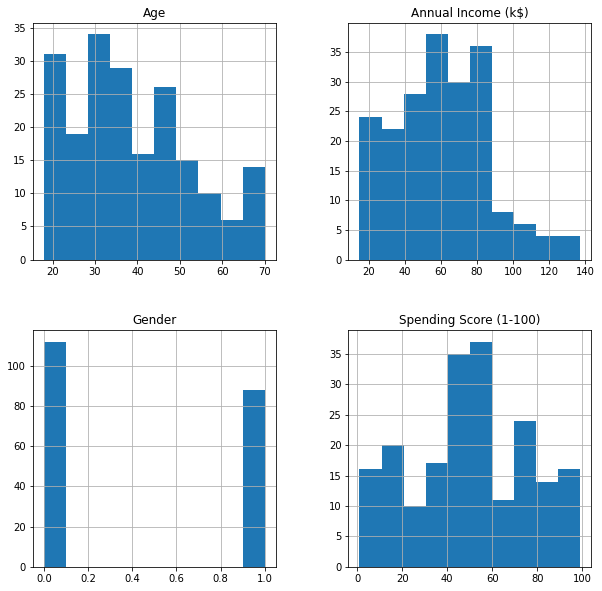

In [8]:
df_lc.hist(figsize=(10,10))

In [0]:
from sklearn import preprocessing 

# Normalizing Data
x = df_lc.iloc[:].values 
x 
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
x_after_min_max_scaler = min_max_scaler.fit_transform(x) 
# print ("\nAfter min max Scaling : \n", x_after_min_max_scaler) 

In [0]:
Standardisation = preprocessing.StandardScaler() 
x_after_Standardisation = Standardisation.fit_transform(x) 
# print ("\nAfter Standardisation : \n", x_after_Standardisation) 
df_final=pd.DataFrame(data=x_after_Standardisation, columns=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

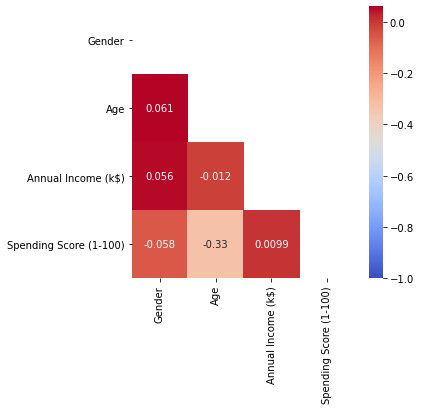

In [0]:
# Visualizing the correlation matrix 
plt.figure(figsize=(5,5))
mask = np.zeros_like(df_final.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_final.corr(), 
            vmin = -1,
            cmap='coolwarm',
            annot=True,
            mask=mask)
# plt.savefig('corr-matrix.png')
plt.show()

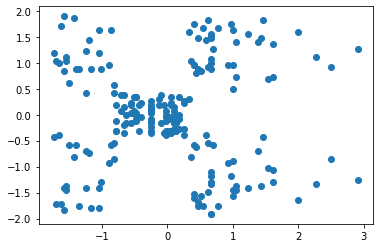

In [11]:
P1 = plt.scatter(df_final['Annual Income (k$)'], df_final['Spending Score (1-100)'])
X1 = df_final.drop(['Gender', 'Age'], axis = 1)


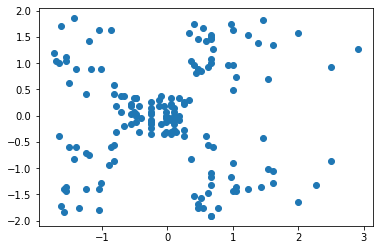

In [12]:
# Splitting the data into train and test 
X1_train, X1_new = train_test_split(X1, test_size=.2,random_state=111 )
# plotting training dataset
plt.scatter(X1_train['Annual Income (k$)'], X1_train['Spending Score (1-100)'], )
plt.show()

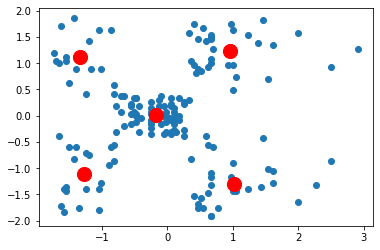

In [13]:
# Our initial guess will be 4 cluster that can assist us to group the similar 
# instance together
clusters = 5
kmeans = KMeans(n_clusters=clusters)
y_pred = kmeans.fit_predict(X1_train)
# plotting the centroids of each group
plt.scatter(X1_train['Annual Income (k$)'], X1_train['Spending Score (1-100)'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.show()

In [14]:
print(y_pred[:20])
# Checking within-cluster sum of squares
kmeans.inertia_

[1 4 3 0 4 1 0 3 4 0 4 2 2 2 4 0 0 0 1 2]


49.63922395961042

In [15]:
kmeans.cluster_centers_ 

array([[-0.18120936,  0.0146794 ],
       [ 0.96241137,  1.23577794],
       [ 1.02104539, -1.29690786],
       [-1.34537695,  1.11806095],
       [-1.27333216, -1.11029664]])

In [16]:
kmeans.predict(X1_new)

array([1, 0, 0, 2, 3, 1, 2, 0, 2, 1, 1, 1, 1, 3, 3, 0, 1, 0, 3, 2, 0, 0,
       2, 0, 0, 0, 0, 1, 3, 2, 3, 0, 0, 0, 0, 2, 4, 0, 4, 4], dtype=int32)

In [0]:
kmeans.transform(X1_new)

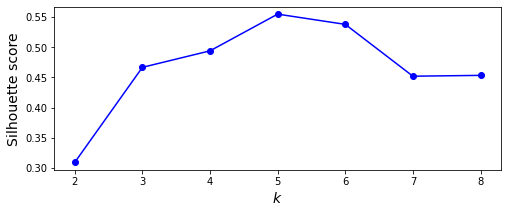

In [18]:
from sklearn.metrics import silhouette_score
kmeans_models = [KMeans(n_clusters=k, random_state=42).fit(X1)
                for k in range(1, 9)]
silhouette_scores = [silhouette_score(X1, model.labels_)
                     for model in kmeans_models[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 9), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()


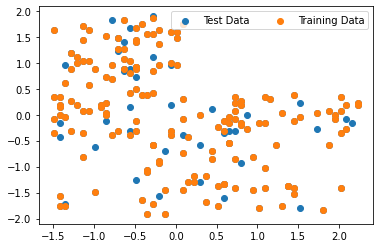

In [39]:
P3 = plt.scatter(df_final['Age'], df_final['Spending Score (1-100)'])
X2 = df_final.drop(['Gender', 'Annual Income (k$)'], axis = 1)
# Splitting the data into train and test 
X2_train, X2_new = train_test_split(X2, test_size=.2,random_state=111 )
# plotting training dataset
P4 = plt.scatter(X2_train['Age'], X2_train['Spending Score (1-100)'])
plt.legend((P3, P4),
           ('Test Data', 'Training Data'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=10)


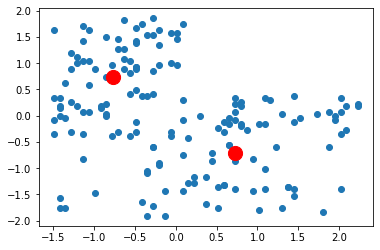

In [44]:
# Our initial guess will be 6 cluster that can assist us to group the similar 
# instance together
clusters = 2
kmeans = KMeans(n_clusters=clusters)
y_pred2 = kmeans.fit_predict(X2_train)
# plotting the centroids of each group
plt.scatter(X2_train['Age'], X2_train['Spending Score (1-100)'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.show()

In [0]:
print(y_pred2[:20])
# Checking within-cluster sum of squares
print(kmeans.inertia_)
print(kmeans.cluster_centers_)
print(kmeans.predict(X2_new))
print(kmeans.transform(X2_new))

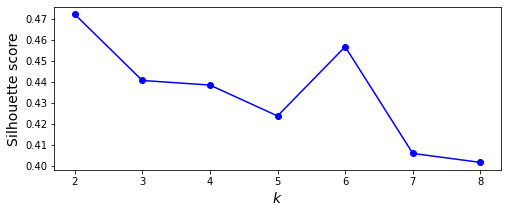

In [46]:
from sklearn.metrics import silhouette_score
kmeans_models = [KMeans(n_clusters=k, random_state=42).fit(X2)
                for k in range(1, 9)]
silhouette_scores = [silhouette_score(X2, model.labels_)
                     for model in kmeans_models[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 9), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

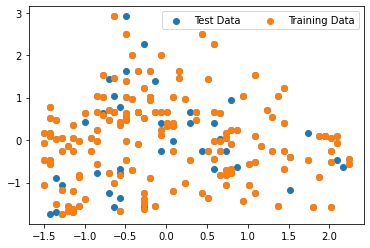

In [47]:
P5 = plt.scatter(df_final['Age'], df_final['Annual Income (k$)'], label='first')
X3 = df_final.drop(['Gender', 'Spending Score (1-100)'], axis = 1)
# Splitting the data into train and test 
X3_train, X3_new = train_test_split(X3, test_size=.2,random_state=111 )
# plotting training dataset
P6 = plt.scatter(X3_train['Age'], X3_train['Annual Income (k$)'], label='first')
plt.legend((P5, P6),
           ('Test Data', 'Training Data'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=10)

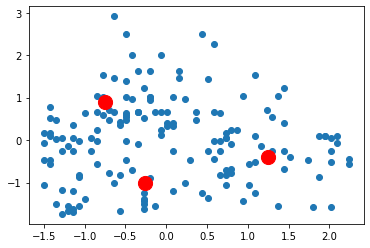

In [48]:
# Our initial guess will be 4 cluster that can assist us to group the similar 
# instance together
clusters = 3
kmeans = KMeans(n_clusters=clusters)
y_pred3 = kmeans.fit_predict(X2_train)
# plotting the centroids of each group
plt.scatter(X3_train['Age'], X3_train['Annual Income (k$)'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.show()

In [0]:
print(y_pred3[:20])
# Checking within-cluster sum of squares
print(kmeans.inertia_)
print(kmeans.cluster_centers_)
print(kmeans.predict(X3_new))
print(kmeans.transform(X3_new))

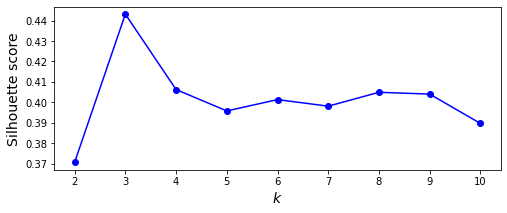

In [38]:
from sklearn.metrics import silhouette_score
kmeans_models = [KMeans(n_clusters=k, random_state=111).fit(X3)
                for k in range(1, 11)]
silhouette_scores = [silhouette_score(X3, model.labels_)
                     for model in kmeans_models[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 11), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()